In [11]:
import tensorflow as tf
import keras 
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Conv2D
from keras.layers import Activation ,Dropout,MaxPooling2D,Flatten
import cv2
import random
%matplotlib inline
random.seed(10)

In [16]:
path=Path('downloads')

In [17]:
path=path.glob("*")
print(path)

<generator object Path.glob at 0x0000018E1A3EB938>


In [18]:
images=[]
lables=[]
dict={'bike':0,'cars':1,'train':2}

In [19]:
for i in path:
    label=str(i).split("\\")[-1]
    print(label)
    for j in i.glob("*.jpg"):
        img=cv2.imread(str(j))
        img=cv2.resize(img,(100,100))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #print(img.shape)
        #plt.imshow(img)
        #plt.show()
        lables.append(dict[label])
        images.append(img)
        #break
        
    

bike
cars
train


In [20]:
lables=np.array(lables)
print(len(lables))

224


In [304]:
images=np.array(images).astype("float32")

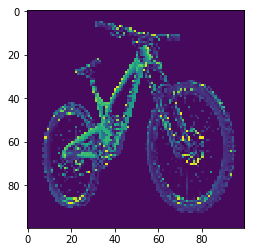

(100, 100)

In [305]:
plt.imshow(images[0])
plt.show()
images[0].shape

In [306]:
num_classes=3
#lables=keras.utils.to_categorical(lables,num_classes)

In [307]:
#lables[0]

In [308]:
images=images.reshape(images.shape[0],100,100,1)
images/=255

In [309]:
#images.shape
#len(images),len(lables)

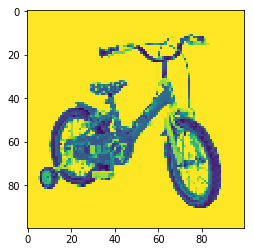

In [310]:
plt.imshow(np.reshape(images[6],(100,100)))

In [311]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,lables,test_size=0.3,random_state=101)
#len(x_train),len(y_train)

In [312]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_train=np.array(y_train)
y_test=keras.utils.to_categorical(y_test,num_classes)
y_test=np.array(y_test)

In [313]:
len(x_train),len(y_train)

(156, 156)

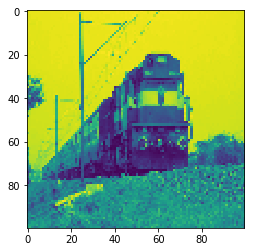

In [314]:
#print(y_train)
plt.imshow(np.reshape(x_train[3],(100,100)))

In [315]:
models=Sequential()

models.add(Conv2D(20,kernel_size=(3,3) ,activation='relu',input_shape=(100, 100, 1)))
models.add(MaxPooling2D(pool_size=(2,2)))

models.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))


models.add(Flatten())
models.add(Dense(128,activation='relu'))
#models.add(Dropout(0.5))
models.add(Dense(num_classes,activation='softmax'))


In [316]:
models.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [318]:
models.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
156/156 [==============================] - 2s 14ms/step - loss: 0.2572 - acc: 0.9295
Epoch 2/20
156/156 [==============================] - 2s 13ms/step - loss: 0.2706 - acc: 0.9295
Epoch 3/20
156/156 [==============================] - 2s 13ms/step - loss: 0.2226 - acc: 0.9103
Epoch 4/20
156/156 [==============================] - 2s 13ms/step - loss: 0.1860 - acc: 0.9551
Epoch 5/20
156/156 [==============================] - 2s 13ms/step - loss: 0.1843 - acc: 0.9615
Epoch 6/20
156/156 [==============================] - 2s 13ms/step - loss: 0.1419 - acc: 0.9744
Epoch 7/20
156/156 [==============================] - 2s 13ms/step - loss: 0.1491 - acc: 0.9615
Epoch 8/20
156/156 [==============================] - 2s 13ms/step - loss: 0.1117 - acc: 0.9872
Epoch 9/20
156/156 [==============================] - 2s 13ms/step - loss: 0.0930 - acc: 0.9936
Epoch 10/20
156/156 [==============================] - 2s 13ms/step - loss: 0.0838 - acc: 0.9872
Epoch 11/20
156/156 [==================

[[9.9935418e-01 6.4269942e-04 3.0645042e-06]]


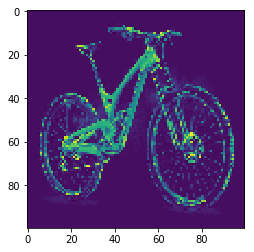

In [327]:
test=np.reshape(x_test[31],(1,100,100,1))
result=models.predict(test)
print(result)
plt.imshow(np.reshape(test,(100,100)))